In this notebook, our goal is to train a CNN model using the CIFAR-10 image dataset. Additionally, we aim to explore and test various techniques, such as augmentation and transfer learning. To proceed, please follow the outlined steps.

# Libraries

Here, you can import the libraries you wish to use. Feel free to add more as needed.

In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

# Load the CIFAR10 dataset

Here, load the CIFAR-10 dataset from the prebuilt datasets in Keras as separate training and validation datasets.

In [ ]:
class_names = ("Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck")

##################################################
################### YOUR CODES ###################
(x_train, y_train), (x_val, y_val) = cifar10.load_data()
##################################################

print('Training:', x_train.shape, y_train.shape)
print('Validation:', x_val.shape, y_val.shape)

170498071/170498071 [==============================] - 13s 0us/step
Training: (50000, 32, 32, 3) (50000, 1)
Validation: (10000, 32, 32, 3) (10000, 1)


Let's see some random examples.

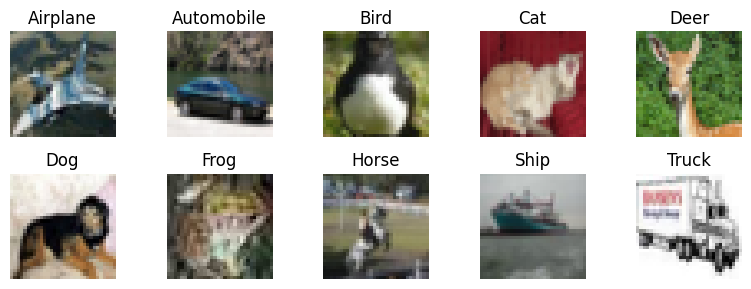

In [ ]:
fig = plt.figure(figsize=(8, 3))

for class_index in range(len(class_names)):
    examples = x_train[y_train.flatten() == class_index]
    random_index = np.random.randint(0, examples.shape[0])
    image = examples[random_index]

    ax = fig.add_subplot(2, 5, class_index + 1)
    ax.imshow(image)
    ax.set_title(class_names[class_index])
    ax.axis('off')

plt.tight_layout()
plt.show()

Remember to `normalize` your data and encode your labels using the `one-hot encoding` technique.

In [ ]:
##################################################
################### YOUR CODES ###################
def preproccess(data ,label):
  data = data.astype("float32") / 255
  data = np.expand_dims(data, -1)
  label = keras.utils.to_categorical(label, 10)
  return data , label


x_train , y_train = preproccess(x_train , y_train)
x_val , y_val = preproccess(x_val ,y_val)

##################################################

# a) Simple CNN model
In this section, you have to create your own simple CNN model using either the sequential or functional API provided by the Keras library. You can refer to the example provided in this [link](https://keras.io/examples/vision/mnist_convnet/) for guidance. Feel free to design your model according to your preferences.

In [ ]:
##################################################
################### YOUR CODES ###################
shape = (32,32,3)
model = keras.Sequential(
    [
        keras.Input(shape=shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

##################################################

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dropout (Dropout)           (None, 2304)              0

Now, it's time to compile your model using an appropriate `loss function` and `optimizer`.

In [ ]:
##################################################
################### YOUR CODES ###################
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
##################################################

Train your model for `10 epochs` and proper `batch_size`.

In [ ]:
##################################################
################### YOUR CODES ###################
history = model.fit(x_train, y_train, epochs= 10, validation_data=(x_val, y_val), batch_size= 64)
##################################################

Epoch 1/10
782/782 [==============================] - 14s 6ms/step - loss: 1.6403 - accuracy: 0.4078 - val_loss: 1.3230 - val_accuracy: 0.5383
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 1.3245 - accuracy: 0.5314 - val_loss: 1.2052 - val_accuracy: 0.5825
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 1.2141 - accuracy: 0.5729 - val_loss: 1.1110 - val_accuracy: 0.6208
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 1.1408 - accuracy: 0.6031 - val_loss: 1.0819 - val_accuracy: 0.6172
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 1.0974 - accuracy: 0.6175 - val_loss: 1.0304 - val_accuracy: 0.6429
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 1.0601 - accuracy: 0.6311 - val_loss: 0.9845 - val_accuracy: 0.6655
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 1.0345 - accuracy: 0.6413 - val_loss: 0.9624 - val_accuracy: 0.6696
Epoch

This function plots the `loss` and `accuracy` of your model by the model's history.

In [6]:
def plot_acc_loss(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    fig = plt.figure(figsize=(10, 3))
    fig.add_subplot(1, 2, 1)
    plt.plot(train_acc)
    plt.plot(val_acc)
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    fig.add_subplot(1, 2, 2)
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

Let's see your model performance.

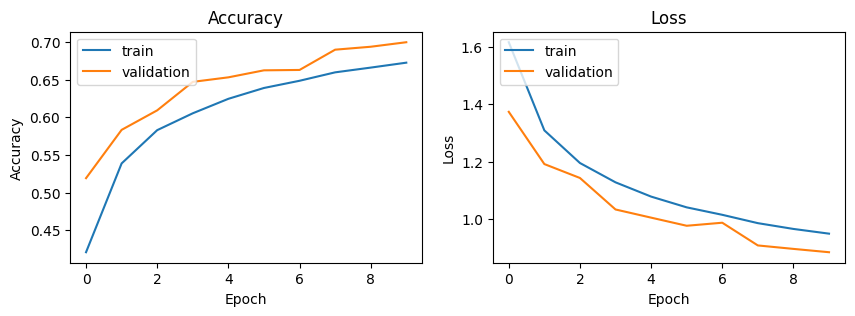

In [ ]:
plot_acc_loss(history)

# b) Simple CNN model + augmentation
In this section, you will utilize your previous model and apply `at least two` suitable augmentation techniques. For further guidance, you can refer to this  [link](https://www.tensorflow.org/tutorials/images/data_augmentation).

In [2]:
##################################################
################### YOUR CODES ###################
#use basic augmentation on model :

#the second and third layer are 2 different augmentation based on model
model = keras.Sequential(
    [
        keras.Input(shape=(32,32,3)),
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)
##################################################

In [ ]:
##################################################
################### YOUR CODES ###################
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
##################################################

In [ ]:
##################################################
################### YOUR CODES ###################
history = model.fit(x_train, y_train, epochs= 10, validation_data=(x_val, y_val), batch_size= 64)
##################################################

Epoch 1/10
782/782 [==============================] - 8s 8ms/step - loss: 1.8923 - accuracy: 0.3085 - val_loss: 1.7406 - val_accuracy: 0.3692
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 1.7310 - accuracy: 0.3726 - val_loss: 1.6179 - val_accuracy: 0.4249
Epoch 3/10
782/782 [==============================] - 5s 7ms/step - loss: 1.6629 - accuracy: 0.3996 - val_loss: 1.5135 - val_accuracy: 0.4609
Epoch 4/10
782/782 [==============================] - 5s 7ms/step - loss: 1.6117 - accuracy: 0.4172 - val_loss: 1.5071 - val_accuracy: 0.4651
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 1.5866 - accuracy: 0.4313 - val_loss: 1.4347 - val_accuracy: 0.4931
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 1.5690 - accuracy: 0.4381 - val_loss: 1.5081 - val_accuracy: 0.4594
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 1.5423 - accuracy: 0.4469 - val_loss: 1.4196 - val_accuracy: 0.5024
Epoch 

Let's see your model performance with augmentation.

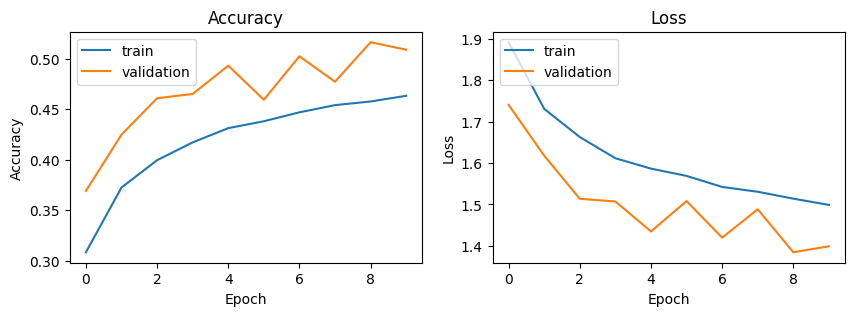

In [ ]:
plot_acc_loss(history)

# c) Transfer learning: Using pretrained ResNet50 on ImageNet
For more detailed guidance, please refer to this [link](https://keras.io/guides/transfer_learning/).

## Resize input to 224 * 224 (`extra bonus`)

In [3]:
#define model
input = keras.Input(shape = (224,224,3))
resnet = keras.applications.ResNet50(weights = "imagenet" , include_top = False ,input_tensor = input)
#freezing
resnet.trainable = False

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
import tensorflow
model = keras.Sequential(
    [
         layers.Lambda(lambda image: tensorflow.image.resize(image, (224,224))),
        resnet,
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)
model.build((None ,32,32,3))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 random_flip_1 (RandomFlip)  (None, 7, 7, 2048)        0         
                                                                 
 random_rotation_1 (RandomRo  (None, 7, 7, 2048)       0         
 tation)                                                         
                                                                 
 conv2d_4 (Conv2D)           (None, 5, 5, 64)          1179712   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                  

In [4]:

(x_train, y_train), (x_val, y_val) = cifar10.load_data()
x_train = keras.applications.resnet50.preprocess_input(x_train)
x_val = keras.applications.resnet50.preprocess_input(x_val)
y_train = keras.utils.to_categorical(y_train,  10)
y_val = keras.utils.to_categorical(y_val,  10)

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



In [ ]:
history = model.fit(x_train, y_train, epochs= 10, validation_data=(x_val, y_val), batch_size= 128)

Epoch 1/10
391/391 [==============================] - 216s 530ms/step - loss: 0.9470 - accuracy: 0.7101 - val_loss: 0.5102 - val_accuracy: 0.8442
Epoch 2/10
391/391 [==============================] - 192s 492ms/step - loss: 0.5825 - accuracy: 0.8161 - val_loss: 0.4304 - val_accuracy: 0.8751
Epoch 3/10
391/391 [==============================] - 202s 516ms/step - loss: 0.4901 - accuracy: 0.8439 - val_loss: 0.3871 - val_accuracy: 0.8801
Epoch 4/10
391/391 [==============================] - 192s 492ms/step - loss: 0.4391 - accuracy: 0.8612 - val_loss: 0.3925 - val_accuracy: 0.8830
Epoch 5/10
391/391 [==============================] - 202s 517ms/step - loss: 0.4165 - accuracy: 0.8669 - val_loss: 0.3940 - val_accuracy: 0.8867
Epoch 6/10
391/391 [==============================] - 193s 493ms/step - loss: 0.3951 - accuracy: 0.8742 - val_loss: 0.3630 - val_accuracy: 0.8925
Epoch 7/10
391/391 [==============================] - 200s 511ms/step - loss: 0.3825 - accuracy: 0.8780 - val_loss: 0.3847 -

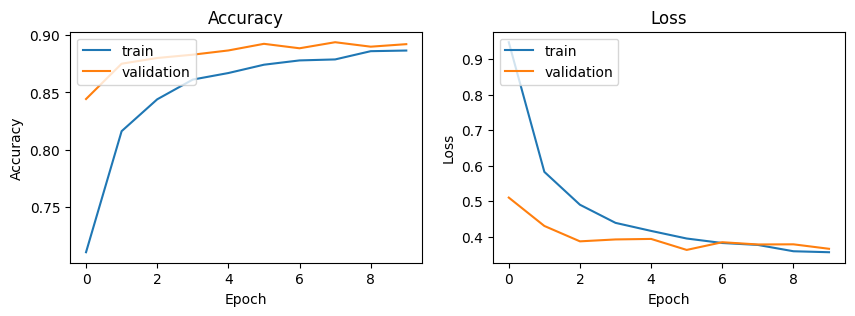

In [ ]:
plot_acc_loss(history)

## Use only the first three blocks (`extra bonus`)

In [5]:
model = keras.Sequential(
    [
         keras.Input(shape = (32,32,3)),
        resnet.layers[1] ,
        resnet.layers[2],
        resnet.layers[3] ,
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)
model.build((None ,32,32,3))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1_pad (ZeroPadding2D)   multiple                  0         
                                                                 
 conv1_conv (Conv2D)         multiple                  9472      
                                                                 
 conv1_bn (BatchNormalizatio  multiple                 256       
 n)                                                              
                                                                 
 random_flip_1 (RandomFlip)  (None, 16, 16, 64)        0         
                                                                 
 random_rotation_1 (RandomRo  (None, 16, 16, 64)       0         
 tation)                                                         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)      

In [8]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
history = model.fit(x_train, y_train, epochs= 10, validation_data=(x_val, y_val), batch_size= 64)

Epoch 1/10
782/782 [==============================] - 17s 8ms/step - loss: 1.9714 - accuracy: 0.2846 - val_loss: 1.7590 - val_accuracy: 0.3505
Epoch 2/10
782/782 [==============================] - 5s 7ms/step - loss: 1.8222 - accuracy: 0.3326 - val_loss: 1.7580 - val_accuracy: 0.3607
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 1.8024 - accuracy: 0.3366 - val_loss: 1.8084 - val_accuracy: 0.3516
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 1.8065 - accuracy: 0.3300 - val_loss: 1.6771 - val_accuracy: 0.3806
Epoch 5/10
782/782 [==============================] - 6s 7ms/step - loss: 1.7854 - accuracy: 0.3420 - val_loss: 1.6762 - val_accuracy: 0.3994
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 1.7773 - accuracy: 0.3482 - val_loss: 1.7915 - val_accuracy: 0.3803
Epoch 7/10
782/782 [==============================] - 6s 7ms/step - loss: 1.7668 - accuracy: 0.3514 - val_loss: 1.7142 - val_accuracy: 0.3824
Epoch

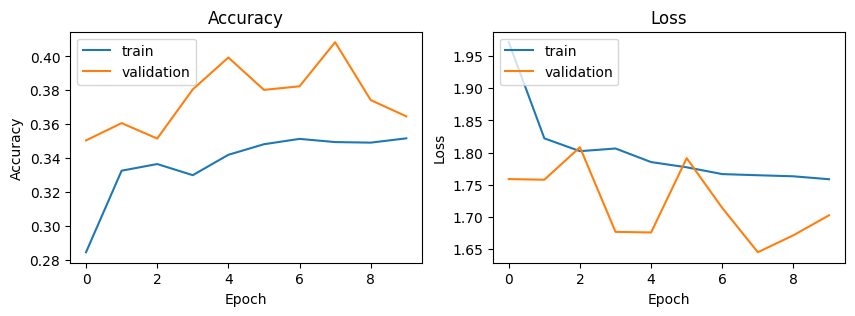

In [10]:
plot_acc_loss(history)